In [232]:
import pandas as pd
import numpy as np
import re
import html

## Look at data ##

In [233]:
filenames = ['sävsjö_articles.csv', 'sävsjö_links.csv', 'sävsjö_tags.csv']

In [234]:
df_articles = pd.read_csv('../Data/sävsjö_articles.csv')
df_links = pd.read_csv('../Data/sävsjö_links.csv', delimiter=';')
df_tags = pd.read_csv('../Data/sävsjö_tags.csv')

In [235]:
df_articles.fillna('', inplace=True)

In [236]:
df_articles

,ID,Title,Text
0,2,Aktiespararna säger ja till Gunvorbudet<span> ...,Aktiespararna rekommenderar sina medlemmar att...
1,5,,Men den här gången är det enbart Anders Eklund...
2,7,Man fast i en timme i grop<span> - kuriren.nu<...,En man i 60-årsåldern föll ner i en grop som v...
3,8,Mannen fastnade i en grop  i flera timmar<spa...,En man i 60-årsåldern trillade ner i ett grävt...
4,56,En motorcykel,Här är den längre versionen.
...,...,...,...
8600,255432,Bringetofta marknad 2022,ewry<br /><br />
8601,255465,BILDEXTRA: Det vandrande skådespelet i Komstad...,<b>I en ljuset av en gl&ouml;dorange sol som s...
8602,255482,Folkdans vid äldreboenden på fredag,Folkdansarna fr&aring;n Sunne kommer till Hagf...
8603,255580,Företagen - en viktig motor i kommunens maskineri,"<b>▪️ Denna text &auml;r en ins&auml;ndare, oc..."


In [237]:
df_links[~df_links['ad_id'].isin(df_articles['ID'].values)]

,ad_id,tag_id
2131,257146,1497
2132,257146,1498
2133,257146,1496
2134,257641,686
2135,257641,1346
2136,257641,1342
2137,257641,1509
2138,257641,1510
2139,257721,686
2140,257721,1345


In [238]:
df_links

,ad_id,tag_id
0,85801,169
1,85801,170
2,85801,171
3,85801,172
4,85801,173
...,...,...
2146,258193,1512
2147,258193,1513
2148,260532,1522
2149,260532,1523


In [239]:
df_tags

,id,value
0,1,Lillian Andersson
1,2,Anders Griph
2,3,Per Hultin
3,4,Samuel Nikolausson
4,5,Aleholm
...,...,...
1488,1489,val
1489,1490,rösta
1490,1491,röstning
1491,1492,vallokal


In [240]:
title = df_articles[df_articles['ID'] == 119480]['Title'].to_numpy()

In [241]:
text = df_articles[df_articles['ID'] == 119480]['Text'].to_numpy()

In [242]:
tags = df_links[df_links['ad_id'] == 119480]['tag_id'].to_numpy()

In [243]:
for tag in tags:
    print(df_tags[df_tags['id'] == tag]['value'])

In [244]:
def un_html(text):
    #remove tags
    text = re.sub(re.compile('<.*?>'), '', text)
    #unescape
    text = html.unescape(text)
    return text

In [245]:
df_tags.iloc[:10]

,id,value
0,1,Lillian Andersson
1,2,Anders Griph
2,3,Per Hultin
3,4,Samuel Nikolausson
4,5,Aleholm
5,6,Fredrik Håkansson
6,7,KD
7,8,röda rosor
8,9,rosor
9,10,dagens ros


In [246]:
df_links_no_names = df_links[df_links['tag_id'] > 6]

In [247]:
print(df_links_no_names, '\n' , len(np.unique(df_links_no_names['ad_id'])))

       ad_id  tag_id
0      85801     169
1      85801     170
2      85801     171
3      85801     172
4      85801     173
...      ...     ...
2146  258193    1512
2147  258193    1513
2148  260532    1522
2149  260532    1523
2150  260532    1524

[2124 rows x 2 columns] 
 555


In [248]:
print(df_links, '\n' , len(np.unique(df_links['ad_id'])))

       ad_id  tag_id
0      85801     169
1      85801     170
2      85801     171
3      85801     172
4      85801     173
...      ...     ...
2146  258193    1512
2147  258193    1513
2148  260532    1522
2149  260532    1523
2150  260532    1524

[2151 rows x 2 columns] 
 560


In [249]:
print(len(np.unique(df_articles['ID'])))

8605


In [250]:
df_links_no_names

,ad_id,tag_id
0,85801,169
1,85801,170
2,85801,171
3,85801,172
4,85801,173
...,...,...
2146,258193,1512
2147,258193,1513
2148,260532,1522
2149,260532,1523


In [251]:
df_articles_with_tags = df_articles[df_articles['ID'].isin(set(df_links_no_names['ad_id']))]

In [252]:
df_articles_with_tags

,ID,Title,Text
5963,85801,Lastbil gled ner i diket,Tisdagen bj&#246;d p&#229; ett rej&#228;lt sla...
5964,85896,Kulturhuset storsatsar under jubileumsåret,Det &#228;r mycket p&#229; g&#229;ng innanf&#2...
5965,85917,Alla partier med när framtidens investeringar ...,Kommunens investeringsbehov har kanske aldrig ...
5966,85956,Nya artister tävlar i Startist – Ett annorlund...,Av 80 s&#246;kande till &#229;rets upplaga av ...
5967,85971,Köksrenovering pågår på Kulturhuset,Efter 25 &#229;r har k&#246;ket p&#229; Kultur...
...,...,...,...
8589,254800,Undersköterskor sluter upp: Kritiserar arbetsv...,<b>Nu h&ouml;js flera r&ouml;ster fr&aring;n v...
8590,254842,Socialchefen svarar på undersköterskornas krit...,<b>Efter kritiken om att undersk&ouml;terskor ...
8596,255200,Nu kan du förtidsrösta - så här går du tillväga,"<b>Fr&aring;n och med idag, onsdagen den 24 au..."
8598,255366,"Socialnämnden: ""Kommer hantera den oro som utt...",<b>I veckan svarade socialchef Linda Bj&ouml;r...


In [253]:
print(un_html(df_articles_with_tags.iloc[0]['Text']), '\n', df_links[df_links['ad_id'] == df_articles_with_tags.iloc[0]['ID']])

Tisdagen bjöd på ett rejält sladdrig väglag med snö och snömodd på både små och stora vägar. Vid halv fyratiden på eftermiddagen fick SOS larm om en singelolycka på väg 128, ett par kilometer söder om kommungränsen mellan Sävsjö och Norra Sandsjö. När räddningstjänsten kom till platsen visade det sig vara en lastbil där chauffören hade kört ut på en parkeringsficka längs vägen.- När han skulle köra igen så fick han inget fäste utan gled ner i diket vid sidan om. Han kan inte ta sig upp själv utan polisen har beställt en bärgare som kommer dra upp bilen, säger Morgan Miledal, insatsledare.Trafiken rullade långsamt förbi olycksplatsen och räddningstjänsten beslutade att lämna platsen innan bärgningen. Men även de kom att få lite bekymmer då en av deras stora bilar också gled i snön och fastnade på liknade sätt så att de fick dra upp sig själva ur diket med hjälp av en av de andra bilarna.Även på väg 127, mellan Vrigstad och avfarten till Norra Ljunga, hade en länstrafikbuss fått liknande

In [254]:
df_tags[df_tags['id'] == 10]

,id,value
9,10,dagens ros


## Visualize ##

In [255]:
art_ids = df_articles['ID'].values

In [256]:
link_cs = [len(df_links[df_links['ad_id']==art_id]) for art_id in art_ids]

In [257]:
df_articlen_tagc = pd.DataFrame(list(zip(art_ids, link_cs)), columns=['ids', 'tagc'])

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

In [259]:
ids, counts = np.unique(df_links['ad_id'], return_counts=True)
id_tagc = dict(zip(ids, counts))

In [260]:
last_id = art_ids[-1]

In [261]:
x_ticks = list()
l = list(range(2))
for x in l:
    x_ticks.append((x+1)*10000)
    if x*10000 < last_id:
        l.append(l[-1]+1)
print(x_ticks)

[10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000, 240000, 250000, 260000, 270000, 280000]


In [262]:
max_y = max(id_tagc.values())+1
y_ticks = list(range(max_y))
print(y_ticks)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


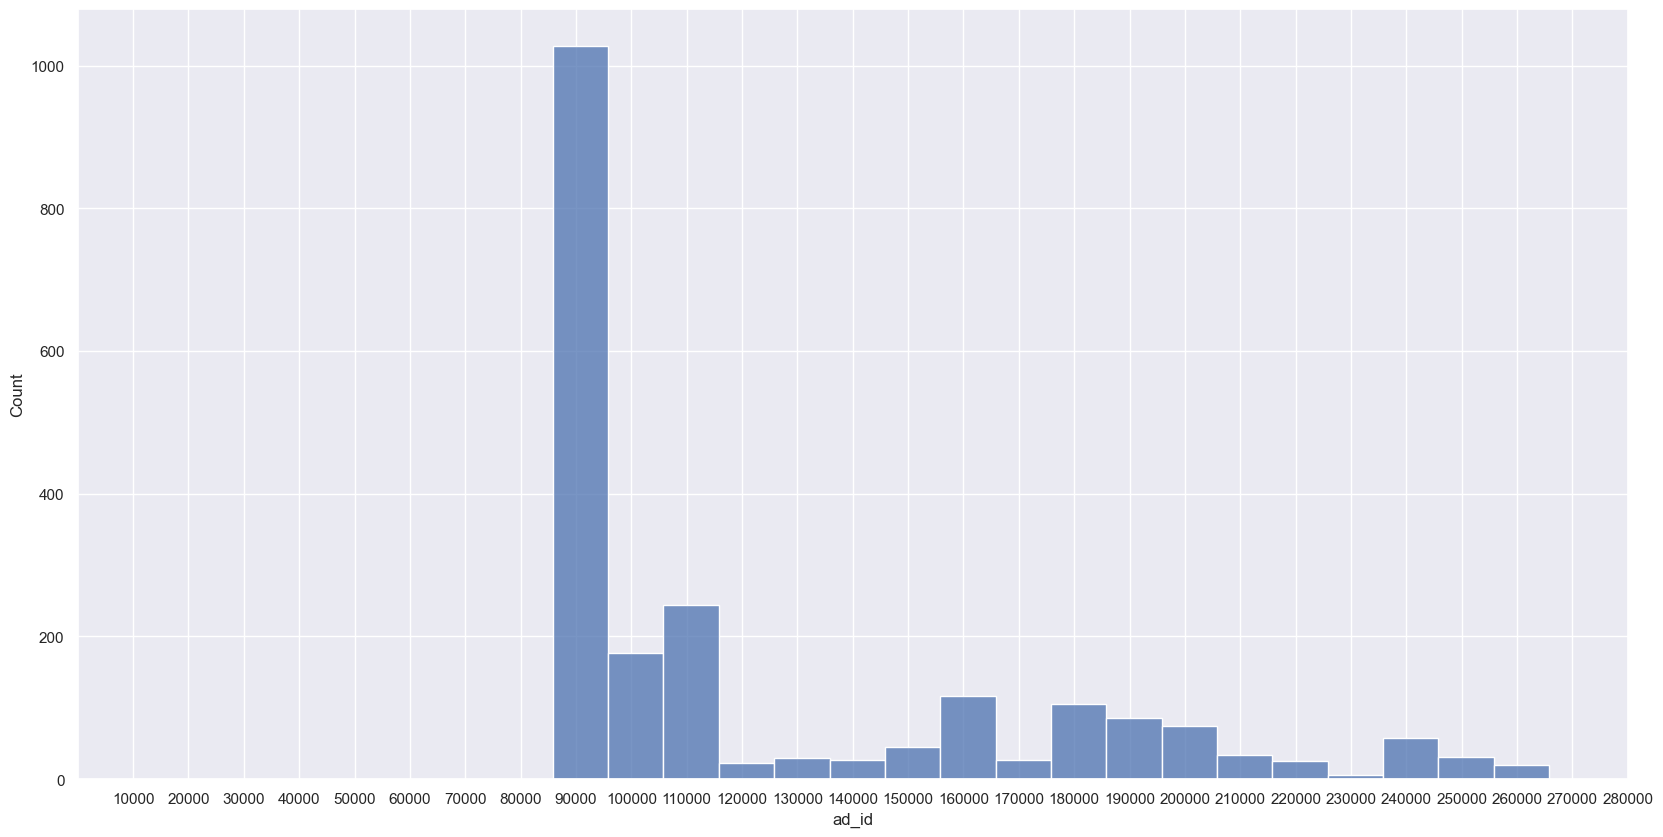

In [263]:
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.histplot(data=df_links, x='ad_id', binwidth=10000, ax=ax)
ax.set_xlim(1, last_id)
ax.set_xticks(x_ticks)
plt.show()

## Preprocessing ##

In [264]:
import spacy
from spacy import displacy
from nltk.corpus import stopwords

nlp = spacy.load("sv_core_news_sm")
stopwords = stopwords.words('swedish')

In [265]:
#print(df_articles['Text'][0])
#text = preprocess(df_articles['Text'][0])
#print(text)
#doc = nlp(text)
#lemmatized = list()
#for i in range(len(doc)):
#    lemmatized.append(doc[i].lemma_)
#print(lemmatized)

In [266]:
#nlp = spacy.load("sv_core_news_sm")
#text = 'bil bilar bilen'
#doc = nlp(text)
#print(type(text), type(doc))
#for token in doc:
#    print(token.lemma_)

In [267]:
def lemmatize(doc):
    doc = nlp(doc)
    lemmatized = list()
    for tok in doc:
        lemmatized.append(tok.lemma_)
    return ' '.join(lemmatized)

In [268]:
def remove_stop_words(doc):
    words = doc.split()
    words = [word for word in words if word not in stopwords]
    return ' '.join(words)

In [269]:
import re
def remove_punctuation(doc):
    doc = re.sub(r'[^\w\s]', '', doc)
    return doc

In [270]:
def remove_numbers(doc):
    doc = re.sub(r'[0-9]', '', doc)
    return doc

In [271]:
def preprocess(doc):
    doc = un_html(doc)
    doc = doc.lower()
    doc = remove_punctuation(doc)
    doc = remove_numbers(doc)
    doc = remove_stop_words(doc)
    doc = lemmatize(doc)
    return doc

In [272]:
df_articles['Text_no_sw'] = df_articles.apply(lambda row: remove_stop_words(row.Text.lower()), axis=1)

In [273]:
#for words in df_articles['Text']:
#    print(preprocess(words))

In [274]:
first = preprocess(df_articles['Text'][4445]).split()
second = preprocess(df_articles['Text'][8604]).split()
in_both = list()
for a in first:
    for b in second:
        if a == b:
            in_both.append(a)
            second.remove(b)
print(set(in_both))

{'sen', 'anette', 'kännas', 'annan', 'skola', 'sävsjö', 'tillägga', 'annie', 'problem', 'fram', 'säga', 'även', 'lokal', 'bland', 'röst', 'väljare', 'ifrån', 'få', 'framgång', 'många', 'flera', 'kommun', 'komma', 'fyra', 'hög', 'tidig', 'nå', 'gustafsson', 'rörvik', 'hel', 'finnas', 'mycket', 'helt', 'val', 'år', 'gå', 'se', 'ta', 'c', 'lite', 'politik', 'parti', 'del', 'stå', 'in', 'bara', 'också'}


## Similarity function ##

In [275]:
def get_jaccard_sims(test_doc, all_docs):
    sims = list()
    test_doc = preprocess(test_doc)
    test_words = set(test_doc.split())
    for other_doc in all_docs:
        other_doc = preprocess(other_doc)
        other_words = set(other_doc.split())
        intersection_size = len(test_words.intersection(other_words))
        union_size = len(test_words) + len(other_words) - intersection_size
        if union_size == 0:
            sims.append(0.0)
        else:
            sims.append(float(intersection_size) / union_size)
    return sims

In [276]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def get_cosine_sims(test_doc, all_docs):
    vectorizer = TfidfVectorizer(preprocessor=preprocess)
    all_docs.insert(0, test_doc)
    embeddings = vectorizer.fit_transform(all_docs)
    return cosine_similarity(embeddings[0:1], embeddings[1:]).flatten()

In [277]:
def get_similarity(test_doc, dataset, sim_metric, mode='Text'):
    
    # to make uniformed vectors, both documents need to be combined first
    all_docs = list()
    for doc in dataset[mode]:
        all_docs.append(doc)
    sims = list()
    if sim_metric == 'jaccard':
        sims = get_jaccard_sims(test_doc, all_docs)
    elif sim_metric == 'cosine':
        sims = get_cosine_sims(test_doc, all_docs)
    else:
        # nothing, handle?
        pass
    
    scores = dict()
    for i, score in enumerate(sims):
        scores[dataset.loc[i].ID] = score
    scores_sorted = {k: v for k, v in sorted(scores.items(), key=lambda item: item[1], reverse=True)}

    
    ## limited top scores list
    #top_scores = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    #top_scores_idxs = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    #for i, score in enumerate(sims):
    #    for j, top_score in enumerate(top_scores):
    #        if score > top_score:
    #            top_scores.insert(j, score)
    #            top_scores_idxs.insert(j, df_articles.loc[i].ID)
    #            top_scores = top_scores[:11]
    #            top_scores_idxs = top_scores_idxs[:11]
    #            break
    
    ## unlimited top scores list (scores for all articles)
    #scores = [sims[0]]
    #scores_idxs = [df_articles.loc[0].ID]
    #for i, new_score in enumerate(sims[1:]):
    #    for j, old_score in enumerate(scores):
    #        if new_score > old_score:
    #            scores.insert(j, new_score)
    #            scores_idxs.insert(j, df_articles.loc[i].ID)
    #            break
    #        if j == len(scores)-1:
    #            scores.append(new_score)
    #            scores_idxs.append(df_articles.loc[i].ID)
                
                
    #print(f'Test document:\n{preprocess(test_doc)}\n')
    #print(f'Top five similar documents by {sim_metric} similarity score:\n')
    #for i, score in enumerate(top_scores[1:]):
    #    doc = all_docs[top_scores_idxs[i+1]]
    #    print(f'Text:\n{preprocess(doc)}\nScore:\n{score}\n')
    
    #results = {top_scores_idxs[i+1]: top_scores[i+1] for i in range(len(top_scores[1:]))}
    #print(top_scores)
    #print(top_scores_idxs)
    
    #results = {scores_idxs[i+1]: scores[i+1] for i in range(len(scores[1:]))}
    
    return scores_sorted

## Prep test document for TF-IDF test ##

In [278]:
test_doc = df_articles['Text'].values[5234]
test_results = dict()

## Get TF-IDF similarity between articles (full texts) ##

In [279]:
test_results['tfidf_cosine_full_full'] = get_similarity(test_doc, df_articles, 'cosine')

In [280]:
test_results['jaccard_full_full'] = get_similarity(test_doc, df_articles, 'jaccard')

## Get TF-IDF similarities between articles (get entities for all) ##

In [281]:
# get entities for all articles
df_articles['Entity'] = df_articles.apply(lambda row: ' '.join([ent.text for ent in nlp(un_html(row.Text)).ents]), axis=1)

In [283]:
# get entities from test document
ents = [ent.text for ent in nlp(un_html(test_doc)).ents]
# make string
ents = ' '.join(ents)
# get similarities to list of entities
test_results['tfidf_cosine_ent_ent'] = get_similarity(ents, df_articles, 'cosine', 'Entity')

In [285]:
# get similarities to list of entities
test_results['jaccard_ent_ent'] = get_similarity(ents, df_articles, 'jaccard', 'Entity')

## Get TF-IDF similarities between articles (only get entities for test document) ##

In [286]:
test_results['tfid_cosine_ent_full'] = get_similarity(ents, df_articles, 'cosine')

In [287]:
test_results['jaccard_ent_full'] = get_similarity(ents, df_articles, 'jaccard')

In [288]:
df_articles

,ID,Title,Text,Text_no_sw,Entity
0,2,Aktiespararna säger ja till Gunvorbudet<span> ...,Aktiespararna rekommenderar sina medlemmar att...,aktiespararna rekommenderar medlemmar anta bud...,
1,5,,Men den här gången är det enbart Anders Eklund...,gången enbart anders eklunds eget blod. år sen...,Anders Eklunds
2,7,Man fast i en timme i grop<span> - kuriren.nu<...,En man i 60-årsåldern föll ner i en grop som v...,60-årsåldern föll ner grop grävd egen tomt uta...,Sävsjö
3,8,Mannen fastnade i en grop  i flera timmar<spa...,En man i 60-årsåldern trillade ner i ett grävt...,60-årsåldern trillade ner grävt hål tomt.  gr..., David
4,56,En motorcykel,Här är den längre versionen.,längre versionen.,
...,...,...,...,...,...
8600,255432,Bringetofta marknad 2022,ewry<br /><br />,ewry<br /><br />,
8601,255465,BILDEXTRA: Det vandrande skådespelet i Komstad...,<b>I en ljuset av en gl&ouml;dorange sol som s...,<b>i ljuset gl&ouml;dorange sol s&auml;nkte ho...,Komstad i år Anna-Karin Rostedt Komstad. Komst...
8602,255482,Folkdans vid äldreboenden på fredag,Folkdansarna fr&aring;n Sunne kommer till Hagf...,folkdansarna fr&aring;n sunne kommer hagfors i...,Sunne Hagfors imorgon fredag Hagfors kl. 15.30
8603,255580,Företagen - en viktig motor i kommunens maskineri,"<b>▪️ Denna text &auml;r en ins&auml;ndare, oc...","<b>▪️ text &auml;r ins&auml;ndare, &aring;sikt...",Sävsjö kommun Sävsjö Sävsjö Sverige under de s...


In [289]:
#print(f'Test document:\n{test_doc}\n')
#for result in test_results:
#    print(f"Text:\n{df_articles['Text'].values[list(result.keys())[0]]}\nScore:\n{result[list(result.keys())[0]]}\n")

In [297]:
#for test, scores in test_results.items():
#    print(f'Test: {test}\nScores: {scores}\n')

## SCORE EVERYTHING ##

In [291]:
# get entities for all articles
#df_articles['Entity'] = df_articles.apply(lambda row: ' '.join([ent.text for ent in nlp(row.Text).ents]), axis=1)

In [292]:
def run_all_tests(test_doc, dataset):
    test_results = list()
    print('Test 1 started\n')
    test_results.append(get_similarity(test_doc, dataset, 'cosine'))
    print('Test 1 done\n')
    print('Test 2 started\n')
    test_results.append(get_similarity(test_doc, dataset, 'jaccard'))
    print('Test 2 done\n')
    
    # get entities from test document
    ents = [ent.text for ent in nlp(un_html(test_doc)).ents]
    # make string
    ents = ' '.join(ents)
    # get similarities to list of entities
    print('Test 3 started\n')
    test_results.append(get_similarity(ents, dataset, 'cosine', 'Entity'))
    print('Test 3 done\n')
    print('Test 4 started\n')
    test_results.append(get_similarity(ents, dataset, 'jaccard', 'Entity'))
    print('Test 4 done\n')
    
    # seems garbage
    #test_results.append(get_similarity(ents, dataset, 'cosine'))
    #print('Test 5 done\n')
    #test_results.append(get_similarity(ents, dataset, 'jaccard'))
    #print('Test 6 done\n')
    return test_results

In [293]:
# insane, takes too long
def test_all_articles():
    cols = ['art_id', 'tcff', 'jff', 'tcee', 'jee', 'tcef', 'jef']
    df_test_results = pd.DataFrame(columns=cols)
    
    for art_id, art_text in dict(zip(df_articles['ID'].tolist(), df_articles['Text'].tolist())).items():
        test_results = run_all_tests(art_text)
        df_test_results.loc[len(df_test_results)] = test_results.insert(0, art_id)
    
    return df_test_results

In [294]:
#df_test_results = test_all_articles()

In [352]:
# test all Linus' articles (on random smaller dataset)
def test_some_articles():
    # The decision to build a new school in Rörvik
    la = [28703, 29233, 29281, 29409, 29396, 31158, 100424, 100966, 108859]

    # The new school in Rörvik is being built
    lb = [178818, 185340, 190743, 214169]

    # A new path for walking and bicycling in Rörvik
    lc = [2482, 12731, 27215, 27219, 30525, 101446, 131391, 161046, 164307, 167074, 200707]

    # Internship for people far from the labour market at Sävsjö Camping
    ld = [111921, 163178, 170669, 191645]

    # Motor sport at gymnasium school Aleholm
    le = [31044, 87851, 103293, 165302, 186176, 191683, 208126, 213340, 256564]

    # High water levels in river in Vrigstad
    lf = [31345, 31366, 31376, 31378, 31386, 31403, 31413]

    # New plots in the area Eksjöhovgårdsängen, Sävsjö
    lg = [14242, 19377, 20459]

    # New plots in the area Tällevad, Sävsjö
    lh = [20459, 23552, 30781, 31115, 204970]

    # New plots in the areas Slättsjön and Sandslätt, Vrigstad
    li = [26233, 26697, 30413, 30781]

    # Other articles about paths for walking and bicycling not related to the one in Rörvik
    lj = [2449, 20376, 27988, 29683, 87275, 123764]

    # New apartments being built at Sturevallen, Sävsjö
    lk = [29906, 30270, 30597, 30652, 30779, 99127, 88544, 104386, 106105]

    # 71 total articles

    # remove lg, lh, li due to id overlap?
    all_lists = [la, lb, lc, ld, le, lf, lg, lh, li, lj, lk]

    all_articles = [item for sublist in all_lists for item in sublist]
    
    # remove ids not in dataset
    removed_ids = [art_id for art_id in all_articles if art_id not in df_articles['ID'].tolist()]
    print(removed_ids)
    for i, lst in enumerate(all_lists):
        all_lists[i] = list(filter(lambda art_id: art_id not in removed_ids, lst))
    all_articles = list(filter(lambda art_id: art_id not in removed_ids, all_articles))

    df_articles_list_subset = df_articles[df_articles['ID'].isin(all_articles)]
    df_articles_random_subset = df_articles[~df_articles['ID'].isin(all_articles)].sample(frac=0.1)
    df_test = pd.concat([df_articles_random_subset, df_articles_list_subset], ignore_index=True)
    
    test_results = list()
    
    for i in range(len(all_lists)):
        print(f'List {i+1} out of {len(all_lists)} started.\n')
        for j in range(len(all_lists[i])):
            print(f'Article {j+1} out of {len(all_lists[i])} started.\n')
            res = run_all_tests(df_test[df_test['ID']==all_lists[i][j]]['Text'].values[0], df_test)
            res.insert(0, all_lists[i][j])
            test_results.append(res)
            print(f'Article {j+1} out of {len(all_lists[i])} completed.\n')
        print(f'Article {i+1} out of {len(all_lists)} completed.\n')
    
    return test_results

In [353]:
#df_test_results
test_results = test_some_articles()
df_test_results = pd.DataFrame(test_results, columns = ['art_id', 'tcff', 'jff', 'tcee', 'jee'])

[256564]
List 1 out of 11 started.

Article 1 out of 9 started.

Test 1 started

Test 1 done

Test 2 started

Test 2 done

Test 3 started

Test 3 done

Test 4 started

Test 4 done

Article 1 out of 9 completed.

Article 2 out of 9 started.

Test 1 started

Test 1 done

Test 2 started

Test 2 done

Test 3 started

Test 3 done

Test 4 started

Test 4 done

Article 2 out of 9 completed.

Article 3 out of 9 started.

Test 1 started

Test 1 done

Test 2 started

Test 2 done

Test 3 started

Test 3 done

Test 4 started

Test 4 done

Article 3 out of 9 completed.

Article 4 out of 9 started.

Test 1 started

Test 1 done

Test 2 started

Test 2 done

Test 3 started

Test 3 done

Test 4 started

Test 4 done

Article 4 out of 9 completed.

Article 5 out of 9 started.

Test 1 started

Test 1 done

Test 2 started

Test 2 done

Test 3 started

Test 3 done

Test 4 started

Test 4 done

Article 5 out of 9 completed.

Article 6 out of 9 started.

Test 1 started

Test 1 done

Test 2 started

Test 2 don

In [431]:
df_test_results

,art_id,tcff,jff,tcee,jee
0,28703,"{28703: 1.0000000000000004, 100966: 0.41306755...","{28703: 1.0, 31158: 0.18579234972677597, 10096...","{28703: 1.0, 22420: 0.7943133404223446, 211366...","{28703: 1.0, 30652: 0.45454545454545453, 10096..."
1,29233,"{29233: 1.0000000000000002, 29409: 0.360148876...","{29233: 1.0, 29409: 0.21370967741935484, 29281...","{29233: 1.0000000000000002, 164048: 0.81870511...","{29233: 1.0, 100424: 0.21428571428571427, 2852..."
2,29281,"{29281: 1.0000000000000004, 29396: 0.318819719...","{29281: 1.0, 29409: 0.23868312757201646, 29233...","{29281: 1.0000000000000002, 86984: 0.679327093...","{29281: 1.0, 86984: 0.4444444444444444, 28703:..."
3,29409,"{29409: 0.9999999999999999, 29233: 0.360441339...","{29409: 1.0, 29281: 0.23868312757201646, 29233...","{29409: 1.0, 108859: 0.8253116892465295, 18769...","{29409: 1.0, 29281: 0.36363636363636365, 10042..."
4,29396,"{29396: 1.0, 30371: 0.3279590248995586, 31368:...","{29396: 1.0, 31307: 0.18867924528301888, 30371...","{29396: 1.0000000000000002, 31368: 0.770032033...","{29396: 1.0, 87366: 0.4375, 219074: 0.33333333..."
...,...,...,...,...,...
65,30779,"{30779: 1.0, 30652: 0.26306912271978644, 29906...","{30779: 1.0, 30652: 0.1625, 26756: 0.158450704...","{30779: 1.0000000000000002, 88544: 0.489087327...","{30779: 1.0, 25382: 0.3333333333333333, 20424:..."
66,99127,"{99127: 1.0, 30779: 0.22248066391486115, 21234...","{99127: 1.0, 104386: 0.11320754716981132, 1061...","{1224: 0.0, 23088: 0.0, 19606: 0.0, 31307: 0.0...","{1224: 0.0, 23088: 0.0, 19606: 0.0, 31307: 0.0..."
67,88544,"{88544: 0.9999999999999999, 29906: 0.255309776...","{88544: 1.0, 30779: 0.15028901734104047, 31115...","{88544: 1.0, 30779: 0.49559152541328727, 30058...","{88544: 1.0, 30058: 0.16666666666666666, 30779..."
68,104386,"{104386: 0.9999999999999999, 106105: 0.3752263...","{104386: 1.0, 106105: 0.16417910447761194, 991...","{104386: 1.0, 16797: 0.40895461061605076, 2825...","{104386: 1.0, 15438: 0.3333333333333333, 16129..."


In [355]:
df_test_results.to_csv('out_laptop_010', index=False)

In [357]:
# Linus' related articles

# The decision to build a new school in Rörvik
la = [28703, 29233, 29281, 29409, 29396, 31158, 100424, 100966, 108859]

# The new school in Rörvik is being built
lb = [178818, 185340, 190743, 214169]

# A new path for walking and bicycling in Rörvik
lc = [2482, 12731, 27215, 27219, 30525, 101446, 131391, 161046, 164307, 167074, 200707]

# Internship for people far from the labour market at Sävsjö Camping
ld = [111921, 163178, 170669, 191645]

# Motor sport at gymnasium school Aleholm
le = [31044, 87851, 103293, 165302, 186176, 191683, 208126, 213340, 256564]

# High water levels in river in Vrigstad
lf = [31345, 31366, 31376, 31378, 31386, 31403, 31413]

# New plots in the area Eksjöhovgårdsängen, Sävsjö
lg = [14242, 19377, 20459]

# New plots in the area Tällevad, Sävsjö
lh = [20459, 23552, 30781, 31115, 204970]

# New plots in the areas Slättsjön and Sandslätt, Vrigstad
li = [26233, 26697, 30413, 30781]

# Other articles about paths for walking and bicycling not related to the one in Rörvik
lj = [2449, 20376, 27988, 29683, 87275, 123764]

# New apartments being built at Sturevallen, Sävsjö
lk = [29906, 30270, 30597, 30652, 30779, 99127, 88544, 104386, 106105]

# 71 total articles

all_lists = [la, lb, lc, ld, le, lf, lg, lh, li, lj, lk]

all_articles = [item for sublist in all_lists for item in sublist]

# remove ids not in dataset
removed_ids = [art_id for art_id in all_articles if art_id not in df_articles['ID'].tolist()]
for i, lst in enumerate(all_lists):
    all_lists[i] = list(filter(lambda art_id: art_id not in removed_ids, lst))
print(removed_ids)
all_articles = list(filter(lambda art_id: art_id not in removed_ids, all_articles))

[256564]


In [358]:
all_lists

[[28703, 29233, 29281, 29409, 29396, 31158, 100424, 100966, 108859],
 [178818, 185340, 190743, 214169],
 [2482,
  12731,
  27215,
  27219,
  30525,
  101446,
  131391,
  161046,
  164307,
  167074,
  200707],
 [111921, 163178, 170669, 191645],
 [31044, 87851, 103293, 165302, 186176, 191683, 208126, 213340],
 [31345, 31366, 31376, 31378, 31386, 31403, 31413],
 [14242, 19377, 20459],
 [20459, 23552, 30781, 31115, 204970],
 [26233, 26697, 30413, 30781],
 [2449, 20376, 27988, 29683, 87275, 123764],
 [29906, 30270, 30597, 30652, 30779, 99127, 88544, 104386, 106105]]

In [476]:
tests = df_test_results.columns.values[1:]
tests_res = dict()
for test in tests:
    tests_res[test] = list()
    for i in range(len(all_lists)):
        tests_res[test].append(list())
        for j, art_id in enumerate(all_lists[i]):
            tests_res[test][i].append(dict())
            for k, key in enumerate(df_test_results[df_test_results['art_id']==art_id][test].values[0]):
                if key in all_lists[i]:
                    tests_res[test][i][j][key] = k

In [477]:
#print(tests_res)

In [479]:
print([list(ranks.values())[1:] for ranks in tests_res['tcff'][0]])

[[1, 2, 3, 5, 6, 8, 16, 17], [1, 2, 3, 4, 5, 6, 9, 10], [1, 2, 3, 4, 5, 7, 16, 23], [1, 2, 3, 4, 5, 6, 9, 14], [3, 9, 13, 16, 17, 20, 25, 42], [1, 3, 4, 10, 11, 12, 16, 24], [1, 2, 3, 4, 5, 6, 8, 11], [1, 2, 3, 4, 5, 6, 7, 9], [1, 3, 4, 5, 6, 7, 8, 10]]


In [480]:
df_plot_res = pd.DataFrame(columns=['topic_id', 'test_type', 'test_art_id', 'ranks_of_others'])
for test, ranks in tests_res.items():
    for i in range(len(ranks)):
        for j in range(len(ranks[i])):
            for k in range(len(ranks[i][j])-1):
                df_plot_res.loc[len(df_plot_res)] = [i, test, list(ranks[i][j].keys())[0], list(ranks[i][j].values())[k+1]]

In [481]:
df_plot_res

,topic_id,test_type,test_art_id,ranks_of_others
0,0,tcff,28703,1
1,0,tcff,28703,2
2,0,tcff,28703,3
3,0,tcff,28703,5
4,0,tcff,28703,6
...,...,...,...,...
1771,10,jee,106105,161
1772,10,jee,106105,259
1773,10,jee,106105,279
1774,10,jee,106105,333


In [482]:
#df_plot_res[(df_plot_res['topic_id']==0) & (df_plot_res['test_type']=='tcff')].head(20)

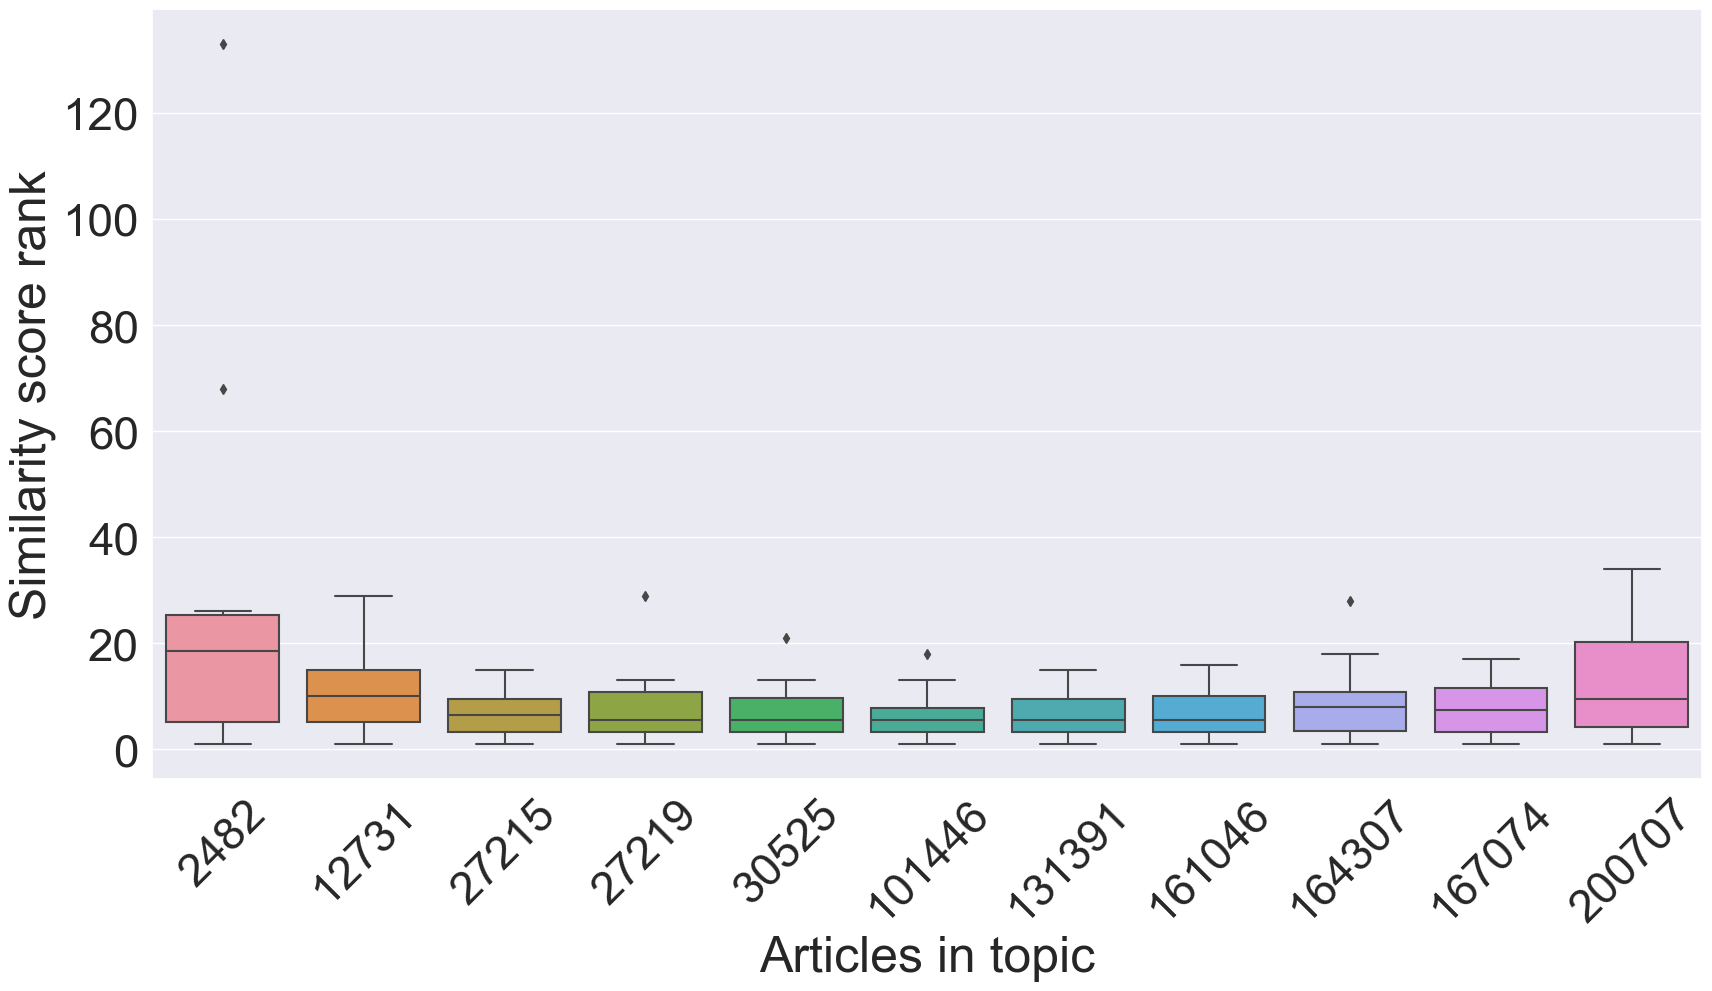

In [557]:
df_subset = df_plot_res[(df_plot_res['topic_id']==2) & (df_plot_res['test_type']=='tcff')]
sns.set(font_scale = 3)
ax = sns.boxplot(x=df_subset['test_art_id'], y=df_subset['ranks_of_others'])
ax.set(xlabel='Articles in topic', ylabel='Similarity score rank')
ax.tick_params(axis='x', rotation=45)
ax.figure.savefig('topic_3_tcff_boxplots', bbox_inches = "tight")
## NOTE THAT MAX RANK IS 0.1*DATASET I.E. 922

In [506]:
#df_subset = df_plot_res[(df_plot_res['topic_id']==0) & (df_plot_res['test_type']=='jff')]
#ax = sns.boxplot(x=df_subset['test_art_id'], y=df_subset['ranks_of_others'])
#ax.set(xlabel='Articles in topics', ylabel='Similarity score rank')

### NOTE THAT MAX RANK IS 0.1*DATASET I.E. 922

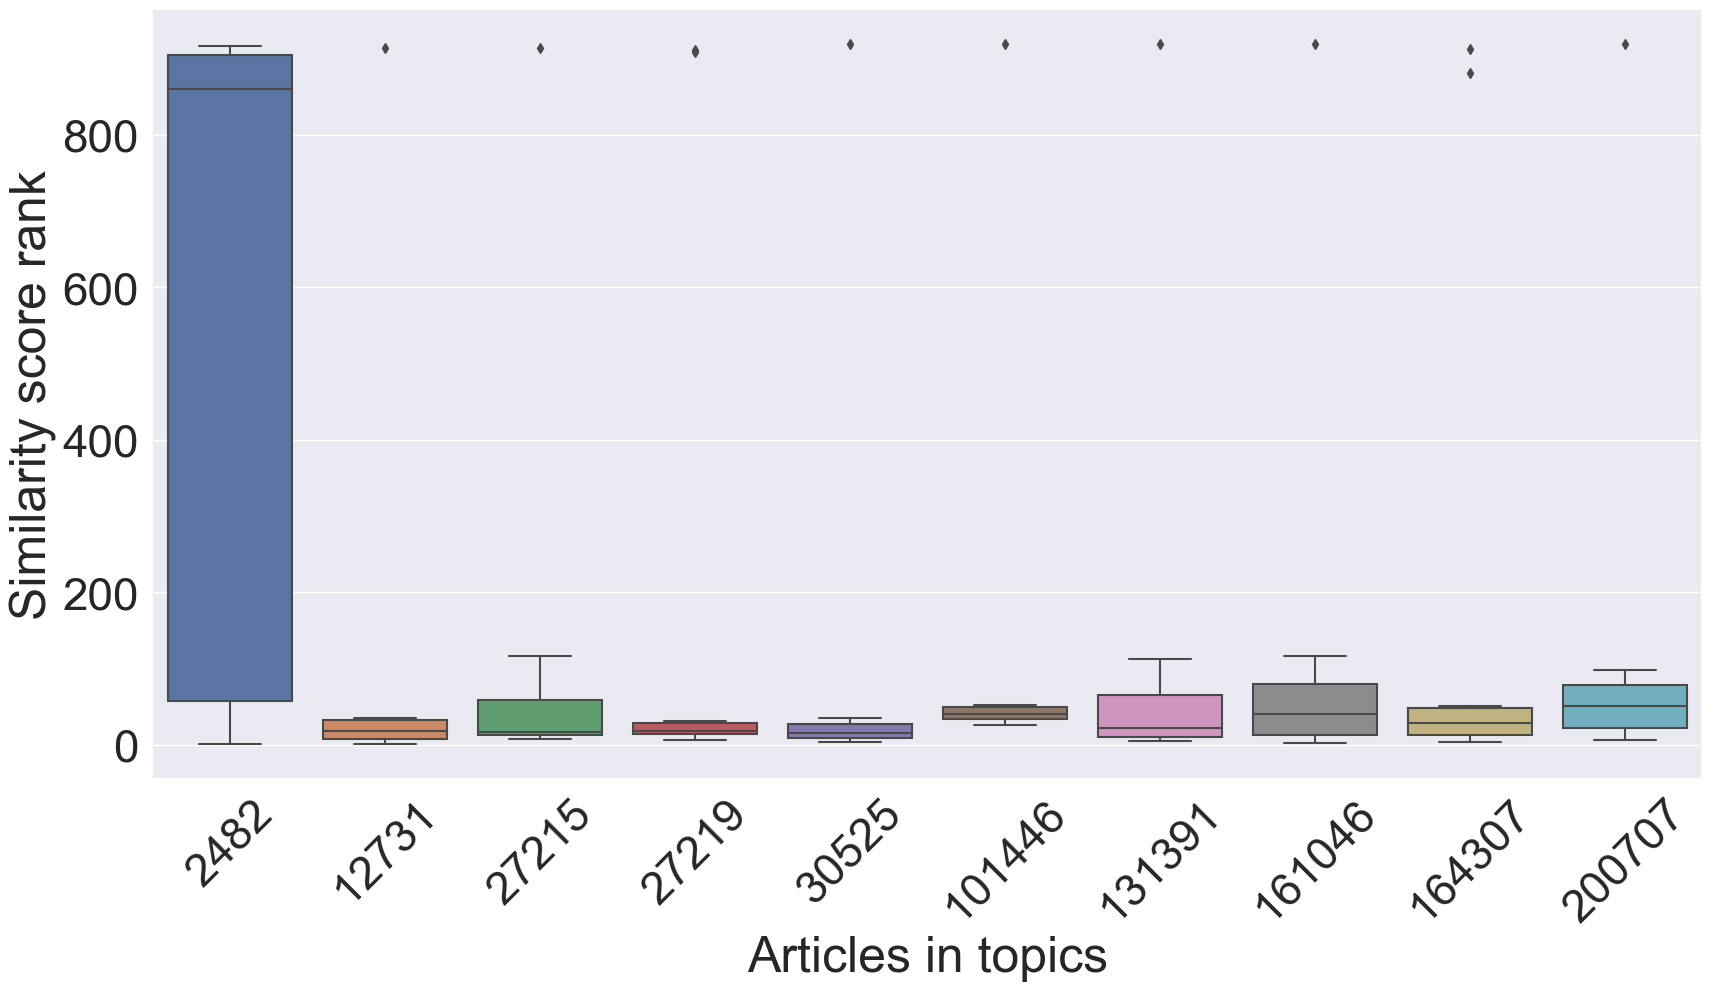

In [555]:
df_subset = df_plot_res[(df_plot_res['topic_id']==2) & (df_plot_res['test_type']=='tcee')]
sns.set(font_scale = 3)
ax = sns.boxplot(x=df_subset['test_art_id'], y=df_subset['ranks_of_others'])
ax.set(xlabel='Articles in topics', ylabel='Similarity score rank')
ax.tick_params(axis='x', rotation=45)
ax.figure.savefig('topic_3_tcee_boxplots', bbox_inches = "tight")
## NOTE THAT MAX RANK IS 0.1*DATASET I.E. 922

In [505]:
#df_subset = df_plot_res[(df_plot_res['topic_id']==0) & (df_plot_res['test_type']=='jee')]
#ax = sns.boxplot(x=df_subset['test_art_id'], y=df_subset['ranks_of_others'])
#ax.set(xlabel='Articles in topics', ylabel='Similarity score rank')

### NOTE THAT MAX RANK IS 0.1*DATASET I.E. 922

## With embeddings ##

In [159]:
embs = np.load('data.npy')

In [103]:
a = np.insert(embs, 0, embs[0], axis=0)

In [102]:
cosine_sims = cosine_similarity(a[0:1], a[1:]).flatten()
#print(cosine_sims[-1])
# get documents with highest similarity
top_scores = [0, 0, 0, 0, 0, 0]
top_scores_idxs = [0, 0, 0, 0, 0, 0]
for i, score in enumerate(cosine_sims):
    for j, top_score in enumerate(top_scores):
        if score > top_score:
            top_scores.insert(j, score)
            top_scores_idxs.insert(j, i+1)
            top_scores = top_scores[:6]
            top_scores_idxs = top_scores_idxs[:6]
            break

print(min(cosine_sims))
print(top_scores)
print(top_scores_idxs)

0.48825437
[1.0000004, 0.95950353, 0.95790935, 0.95713407, 0.95573634, 0.9556565]
[1, 124, 163, 5828, 90, 2609]


In [101]:
test_doc = un_html(df_articles['Text'][0])
print(f'Test document:\n{test_doc}\n')
for result in zip(top_scores, top_scores_idxs):
    print(f"Text:\n{un_html(df_articles['Text'].values[result[1]-1])}\nScore:\n{result[0]}\n")

Test document:
Aktiespararna rekommenderar sina medlemmar att anta budpliktsbudet  som Gunvor Group har lagt på Rörvik Timber. Aktiespararna anser...

Text:
Aktiespararna rekommenderar sina medlemmar att anta budpliktsbudet  som Gunvor Group har lagt på Rörvik Timber. Aktiespararna anser...
Score:
1.0000003576278687

Text:
Nu har den konkursade ICA-affären i Rörvik lagts ut på anbud  alltså inte bara butikverksamheten utan hela fastigheten. Konkursförvaltaren i Jönköping har bråttom med att få in anbuden och det är ur samhällets synpunkt viktigt att man får igång en ny verksamhet snabbt.
Score:
0.9595035314559937

Text:
I Sävsjö har kommunstyrelsens utskott beslutat bjuda in fastighetsgruppen för information om byggnation av framtidens äldreomsorg. Däremot sägs inget om information till dem som är närmast berörda, alltså pensionärerna och deras organisationer.
Score:
0.957909345626831

Text:
I ett brev till Hall Media, undertecknat av kommunstyrelsens ordförande Stefan Gustafsson (KD)